Multiple Linear Regression: Jäiden lähtö. Luo lineaarinen regressiomalli, jossa x on eri vuosien saman kuukauden lämpötilapoikkeama sekä sadepoikkeama (valitsemasi kuukausi)ja y on jäämerkin lähtöpäivä. Älä käytä train-test-split-menetelmää.

# Lineaarinen regressioharjoitus - BONUSTEHTÄVÄ

Jäiden lähdön korrelaatio kuukauden lämpötilaan

https://lcrovaniemi.fi/index.php


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D



Päivät, jolloin jäidenlähtömerkki on lähtenyt

In [2]:
data = {
    "date": [
        "1964-05-14", "1965-05-03", "1966-05-17", "1967-05-10", "1968-05-19",
        "1969-05-20", "1970-05-15", "1971-05-14", "1972-05-11", "1973-05-09",
        "1974-05-13", "1975-05-05", "1976-05-10", "1977-05-12", "1978-05-15",
        "1979-05-11", "1980-05-08", "1981-05-17", "1982-05-10", "1983-04-30",
        "1984-05-07", "1985-05-18", "1986-05-10", "1987-05-16", "1988-05-09",
        "1989-04-27", "1990-04-27", "1991-05-02", "1992-05-08", "1993-05-07",
        "1994-04-30", "1995-05-07", "1996-05-20", "1997-05-16", "1998-05-08",
        "1999-04-29", "2000-04-29", "2001-05-05", "2002-04-29", "2003-05-09",
        "2004-05-01", "2005-05-06", "2006-05-01", "2007-04-27", "2008-05-03",
        "2009-05-03", "2010-05-04", "2011-04-26", "2012-05-07", "2013-05-01",
        "2014-04-24", "2015-04-27", "2016-04-29", "2017-05-17", "2018-05-06",
        "2019-04-29"
    ]
}
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df.head()

,date
0,1964-05-14
1,1965-05-03
2,1966-05-17
3,1967-05-10
4,1968-05-19


In [3]:
df['year'] = df['date'].dt.year
df.head()

,date,year
0,1964-05-14,1964
1,1965-05-03,1965
2,1966-05-17,1966
3,1967-05-10,1967
4,1968-05-19,1968


Lämpötiladata haetaan täältä:

[https://www.ilmatieteenlaitos.fi/tilastoja-vuodesta-1961](https://www.ilmatieteenlaitos.fi/tilastoja-vuodesta-1961)

In [4]:
temp_deviation_df = pd.read_csv('./datasets/t2/rovaniemi.csv', sep=';')
temp_deviation_df.head()

,Category,Keskilämpötilan poikkeama 1991–2020 keskiarvosta
0,1961,"-2,2"
1,1962,"-1,2"
2,1963,4
3,1964,"-0,4"
4,1965,"-3,7"


In [6]:
rain_deviation_df = pd.read_csv('./datasets/t2/rovaniemi-sade.csv', sep=';')
rain_deviation_df.head()

,Category,Sademäärä prosentteina 1991–2020 keskiarvosta
0,1961,100
1,1962,103
2,1963,64
3,1964,71
4,1965,25


In [11]:
# Siivousta ja mergetystä

temp_deviation_df.rename(columns={"Category": "year", "Keskilämpötilan poikkeama 1991–2020 keskiarvosta": "temp_deviation"}, inplace=True) # Siistitään sarakkeet lämpötiladatasta
temp_deviaton_df = temp_deviation_df[temp_deviation_df['year'] >= 1964] # Rajataan lämpötilapoikkeamat sopivaksi jäidenlähtömerkki -dataan
#temp_deviation_df.head()

rain_deviation_df.rename(columns={"Category": "year", "Sademäärä prosentteina 1991–2020 keskiarvosta": "rain_deviation"}, inplace=True) # Siistitään sadepoikkeaman data myös

ice_n_temp_merged_df = pd.merge(df, temp_deviation_df, on='year') # Mergetään

ice_n_temp_merged_df = pd.merge(ice_n_temp_merged_df, rain_deviation_df, on='year') # Mergetään myös sadepoikkeama

ice_n_temp_merged_df['day_of_year'] = ice_n_temp_merged_df['date'].dt.dayofyear # Lisätään päivät kokonaislukuna
ice_n_temp_merged_df.head()

ice_n_temp_merged_df['temp_deviation'] = ice_n_temp_merged_df['temp_deviation'].str.replace(',', '.').astype(float) # Käännetään lämpötilapoikkeaman datatyyppi floatiksi

ice_n_temp_merged_df['rain_deviation'] = ice_n_temp_merged_df['rain_deviation'].astype(float) # Käännetään sadepoikkeaman datatyyppi yhteneväiseksi lämpötilapoikkeaman kanssa

ice_n_temp_merged_df.head()



,date,year,temp_deviation,rain_deviation,day_of_year
0,1964-05-14,1964,-0.4,71.0,135
1,1965-05-03,1965,-3.7,25.0,123
2,1966-05-17,1966,-1.2,72.0,137
3,1967-05-10,1967,-0.9,56.0,130
4,1968-05-19,1968,-3.5,60.0,140


In [13]:
# Määritellään ominaisuudet ja kohde
X = ice_n_temp_merged_df[['temp_deviation', 'rain_deviation']]
y = ice_n_temp_merged_df['day_of_year']

y.head()

0    135
1    123
2    137
3    130
4    140
Name: day_of_year, dtype: int32

In [14]:
# Koulutetaan koko datalla suoraan ilman train-test-split menetelmää

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
# Ennustetaan testijoukolle

y_pred = model.predict(X)

In [26]:
r2 = r2_score(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)

r2, rmse

(0.3343465376615973, np.float64(5.753178819897547))

R2 arvo kasvoi nyt yli kymmenellä prosentilla siihen, kun verrattiin ilman sademäärää eli saimme tarkemmin tuloksen.

RMSE väheni myös yli päivällä eli saimme tämänkin perusteella tarkemman tuloksen.

c:\Users\emilh\OneDrive\Työpöytä\myDev\Projects\ai-ml-tehtava-1\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


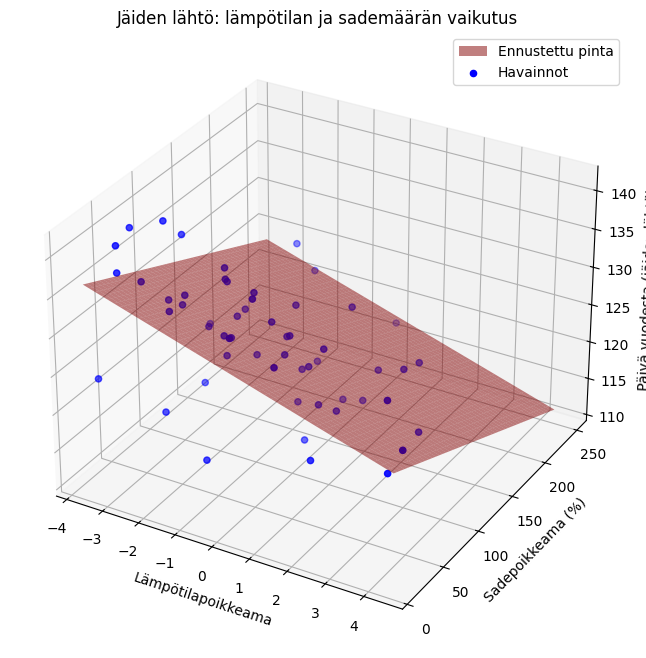

In [27]:
# Visualisoidaan tulokset

# Valmistellaan lämpötila- ja sadealueet
temp_vals = np.linspace(X['temp_deviation'].min(), X['temp_deviation'].max(), 50)
rain_vals = np.linspace(X['rain_deviation'].min(), X['rain_deviation'].max(), 50)
temp_grid, rain_grid = np.meshgrid(temp_vals, rain_vals)

# Ennustetaan jäidenlähtöpäivät (lämpötila ja sade)
combined = np.column_stack([temp_grid.ravel(), rain_grid.ravel()])
predicted_days = model.predict(combined).reshape(temp_grid.shape)

# Luodaan 3D-kuvaaja
figure = plt.figure(figsize=(12, 8))
axis = figure.add_subplot(111, projection='3d')

# Piirretään ennustettu pinta
axis.plot_surface(temp_grid, rain_grid, predicted_days, color='red', alpha=0.5, label='Ennustettu pinta')

# Lisätään havaintopisteet (todelliset tiedot)
axis.scatter(X['temp_deviation'], X['rain_deviation'], y, color='blue', label='Havainnot')

axis.set_xlabel('Lämpötilapoikkeama')
axis.set_ylabel('Sadepoikkeama (%)')
axis.set_zlabel('Päivä vuodesta (jäiden lähtö)')
axis.set_title('Jäiden lähtö: lämpötilan ja sademäärän vaikutus')
plt.legend()
plt.show()

